In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import openturns as ot
import pandas as pd
import scipy
import seaborn as sns

from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap


from sklearn import cluster, mixture
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

output_notebook()

Loading BokehJS ...

## Load the data

In [15]:
%%bash
# List the .csv files that are possible to analyze.
ls *.csv

B98.csv
BG98_EUROPE.csv
XFA-EUROVEH.csv


In [27]:
# Load the data
df = pd.read_csv('./B98.csv', header=None, index_col=0)

In [74]:
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
01/2013,2.095211,4.278267,3.961642,2.382186,3.412345,3.130373,3.762847,3.848019,4.544106,7.643071,...,4.877514,4.392725,3.464998,4.650119,5.073246,7.046810,9.076671,11.989240,16.053625,17.473212
02/2013,1.243013,4.677519,4.229476,5.089797,7.779773,7.063859,5.008871,5.345327,7.170142,10.149797,...,5.968644,5.147472,6.465291,7.979396,10.037398,12.955837,12.957628,15.308245,15.915508,17.314180
03/2013,1.320071,4.420377,5.164529,11.326923,12.240197,7.849134,6.264260,7.613348,8.940658,9.188314,...,6.976773,7.497644,6.901841,9.600055,11.511351,15.226597,14.257616,15.700610,13.876145,13.297487
04/2013,1.678648,19.873565,11.560579,10.649665,10.441620,6.067070,6.744401,5.166904,5.535006,6.233233,...,3.821708,6.029104,6.565934,5.054691,5.387032,7.684662,6.330084,8.581286,7.962417,8.903116
05/2013,0.991342,4.414898,3.147982,3.770556,2.010535,3.932643,3.232230,3.629052,3.830632,4.640984,...,4.679165,5.257205,5.930638,6.427134,5.998483,6.522112,6.361454,5.826462,5.748289,6.697727
06/2013,1.689523,4.614420,3.313112,2.980872,2.758816,3.706487,3.544920,3.656641,2.998073,3.807419,...,5.064498,4.087311,4.214941,3.737378,4.765316,5.240615,4.371295,4.959782,5.362924,6.899755
07/2013,1.093334,3.778543,2.442783,2.952084,3.377586,3.558146,4.409285,3.256571,3.808855,2.832352,...,5.054806,5.036016,5.590157,4.105784,5.213898,4.495654,3.507648,4.385827,4.798165,6.692762
08/2013,1.138278,3.329614,5.750160,2.233148,4.019696,3.234900,2.485872,3.738833,2.699228,3.470520,...,2.833161,2.476357,6.143669,3.845035,3.661830,2.706340,3.607741,3.856670,4.657333,7.264553
09/2013,1.274717,3.490802,2.797414,2.619666,3.107207,3.741869,2.886524,3.280172,4.066995,3.264438,...,4.614181,5.566430,4.125779,4.726795,3.213218,4.621961,4.467691,4.005874,4.550033,8.443047


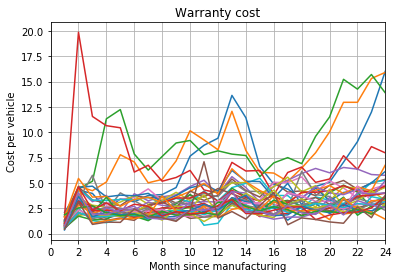

In [66]:
def plot_months(data):
    """Plot the data for all the months."""
    df = data.T
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df)
    ax.set_xlim([0, len(df)-1])
    
    plt.title('Warranty cost')
    plt.xlabel('Month since manufacturing')
    plt.xticks(np.arange(0, len(df), 2))
    plt.ylabel('Cost per vehicle')
    plt.grid()
    plt.show()

# Plot all the months
plot_months(df)

## Couts cumulés:

In [71]:
# Build the cumulative dataframe.
df_cum = df.cumsum(axis=1)
df_cum

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
01/2013,2.095211,6.373478,10.335120,12.717306,16.129651,19.260024,23.022870,26.870889,31.414995,39.058066,...,93.758561,98.151285,101.616283,106.266403,111.339648,118.386458,127.463129,139.452369,155.505994,172.979206
02/2013,1.243013,5.920532,10.150008,15.239804,23.019577,30.083437,35.092308,40.437635,47.607776,57.757573,...,107.578861,112.726332,119.191624,127.171020,137.208418,150.164256,163.121884,178.430129,194.345637,211.659816
03/2013,1.320071,5.740449,10.904977,22.231900,34.472097,42.321231,48.585490,56.198838,65.139496,74.327810,...,118.424791,125.922435,132.824276,142.424331,153.935682,169.162279,183.419895,199.120505,212.996651,226.294137
04/2013,1.678648,21.552213,33.112792,43.762456,54.204077,60.271147,67.015548,72.182452,77.717458,83.950691,...,115.522528,121.551632,128.117567,133.172257,138.559289,146.243951,152.574035,161.155322,169.117738,178.020855
05/2013,0.991342,5.406240,8.554222,12.324778,14.335313,18.267956,21.500186,25.129238,28.959870,33.600854,...,60.673238,65.930443,71.861081,78.288214,84.286698,90.808810,97.170263,102.996726,108.745015,115.442742
06/2013,1.689523,6.303943,9.617055,12.597927,15.356743,19.063230,22.608150,26.264791,29.262864,33.070283,...,58.427926,62.515237,66.730178,70.467556,75.232872,80.473487,84.844783,89.804565,95.167489,102.067243
07/2013,1.093334,4.871877,7.314661,10.266745,13.644331,17.202477,21.611762,24.868333,28.677188,31.509540,...,51.755545,56.791561,62.381717,66.487501,71.701400,76.197054,79.704702,84.090529,88.888694,95.581456
08/2013,1.138278,4.467892,10.218053,12.451201,16.470898,19.705798,22.191670,25.930503,28.629731,32.100252,...,55.968933,58.445291,64.588959,68.433994,72.095824,74.802164,78.409905,82.266574,86.923907,94.188461
09/2013,1.274717,4.765519,7.562933,10.182599,13.289806,17.031675,19.918199,23.198371,27.265366,30.529804,...,57.031898,62.598328,66.724108,71.450903,74.664121,79.286082,83.753773,87.759647,92.309679,100.752726


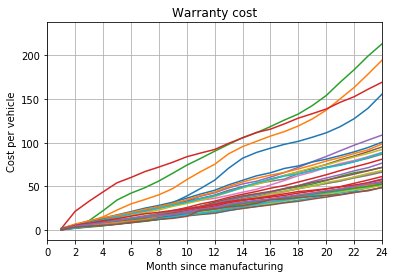

In [73]:
plot_months(df_cum)

## Normalizing data:

In [76]:
from sklearn.preprocessing import StandardScaler

x = df_cum    # x = df si pca sur les couts 

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 2.66373387e+00,  4.86091327e-01,  5.66544909e-01,
         3.40749129e-01,  3.18662566e-01,  3.12388036e-01,
         3.73415090e-01,  4.29364137e-01,  5.03340425e-01,
         7.32467538e-01,  9.94118828e-01,  1.26466647e+00,
         1.60587246e+00,  1.83701659e+00,  1.89000275e+00,
         1.88230710e+00,  1.83805490e+00,  1.75719406e+00,
         1.70334027e+00,  1.64633169e+00,  1.60635265e+00,
         1.63320429e+00,  1.69980441e+00,  1.84495985e+00,
         1.97498728e+00],
       [ 5.66838144e-01,  3.37082155e-01,  5.27703214e-01,
         7.25037098e-01,  1.11907430e+00,  1.41183142e+00,
         1.47080664e+00,  1.55672769e+00,  1.71585084e+00,
         1.98198685e+00,  2.17371834e+00,  2.28555008e+00,
         2.44730093e+00,  2.46097574e+00,  2.45526366e+00,
         2.47138416e+00,  2.42962277e+00,  2.43814139e+00,
         2.46854377e+00,  2.53512778e+00,  2.60826620e+00,
         2.67553997e+00,  2.74440879e+00,  2.80613482e+00,
         2.86400905e+00],
    

## Ploting normalized data:

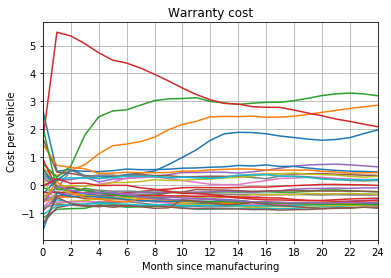

In [84]:
plot_months(x)

## PCA

In [77]:
from sklearn.decomposition import PCA

# calculate the PCA (Eigenvectors & Eigenvalues of the covariance matrix)
pcaA = PCA(n_components=4, copy=True, whiten=False)

pcaA.fit(x)
dpca = pd.DataFrame(pcaA.transform(df))
dpca.index = df.index

In [78]:
for i,pc in enumerate(pcaA.explained_variance_ratio_):
    print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))

1.	89.76%
2.	6.83%
3.	2.74%
4.	0.45%


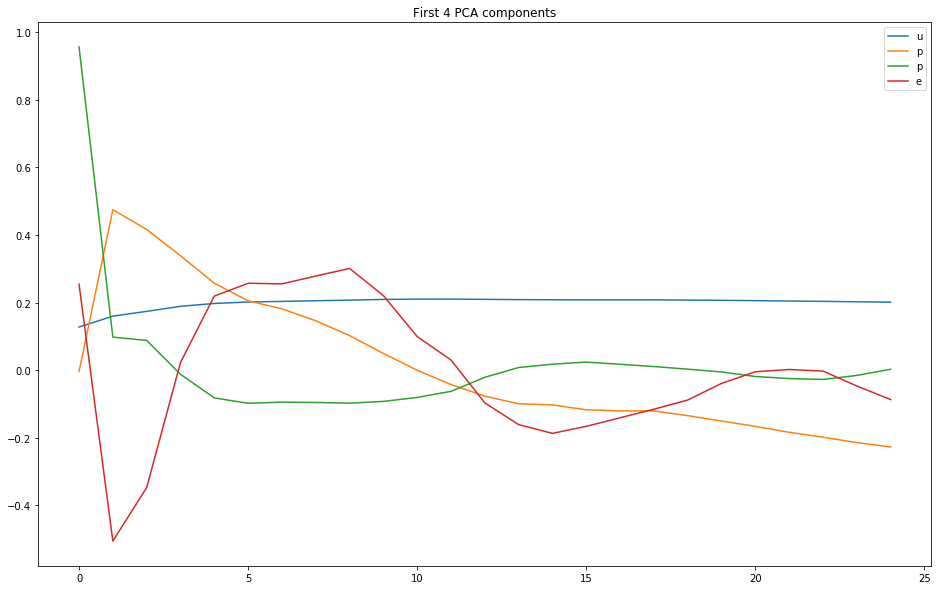

In [79]:
fig = plt.figure(figsize=(16,10))
plt.title('First {0} PCA components'.format(np.shape(np.transpose(pcaA.components_))[-1]))

plt.plot(np.transpose(pcaA.components_), label=['1. PC', '2. PC'])
plt.legend('upper right')

None



## valeurs propres:

In [80]:
print(pcaA.singular_values_)


[28.42311625  7.83777284  4.96575208  2.00188788]


## Reconstruction de la courbe:

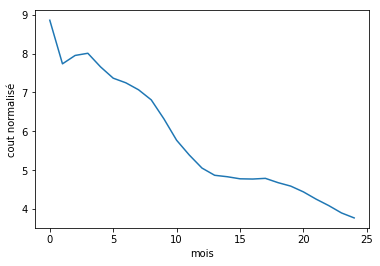

In [81]:
H = []
S = []

for j in range(len(pcaA.components_[0])):
    H.append(j)
    s = 0
    for i in range(len(pcaA.components_)):
        s += pcaA.components_[i][j] * pcaA.singular_values_[i]
    S.append(s)
plt.plot(H,S)
plt.xlabel('mois')
plt.ylabel('cout normalisé')
plt.show()

##  % de variance expliqué:

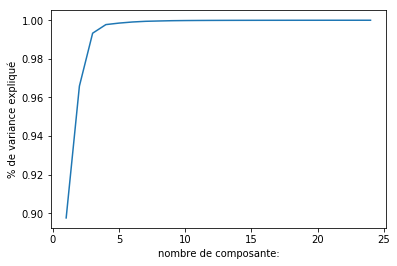

In [82]:
H = []
S = []
for i in range(1,25):
    pcaA = PCA(n_components=i, copy=True, whiten=False)
    pcaA.fit(x)
    dpca = pd.DataFrame(pcaA.transform(df))
    dpca.index = df.index
    L = np.cumsum(pcaA.explained_variance_ratio_)
    H.append(i)
    S.append(L[-1])
plt.plot(H,S)
plt.xlabel('nombre de composante:')
plt.ylabel('% de variance expliqué')
plt.show()